In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()


In [2]:
data=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S36_L236/2.01. Admittance.csv")
data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


## Converting  categorical to dummies

In [3]:
#create a copy and then createe dummies

data1=data.copy()
data1['Admitted']=data1['Admitted'].map({'No':0,'Yes':1})

data1

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Creating Target and feature variables

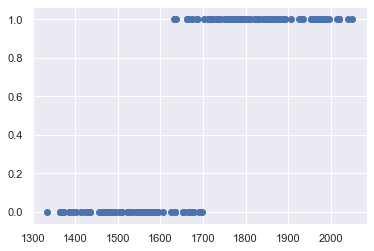

In [4]:
y=data1['Admitted']
x=data1['SAT']
plt.scatter(x,y)

## Creating  regression with OLS model

In [5]:
x1=sm.add_constant(x)
result=sm.OLS(y,x1).fit()
result.params

C:\Users\vikash arya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const   -3.251859
SAT      0.002248
dtype: float64

We can see that this data cannot be described and predicted by linear method...because it does not satisfy 1st assumption


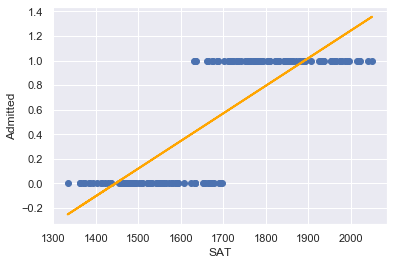

In [6]:
plt.scatter(x,y)
y_hat=result.params[0]+result.params[1]*data1['SAT']
fig=plt.plot(x,y_hat,lw=2,c='orange')
plt.xlabel('SAT')
plt.ylabel('Admitted')
print('We can see that this data cannot be described and predicted by linear method...because it does not satisfy 1st assumption')
plt.show()

# Applying Logistic Regression using statsmodels api

In [7]:
reg_log = sm.Logit(y,x1)
results = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                  0.7992
Time:                        18:14:57   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Multiple Logistic Regression 

In [9]:
raw_data=pd.read_csv("D:/EDU/Udemy/datascience_csv_files/p5_advanced_stats_ml/S36_L244/2.02. Binary predictors.csv")
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [10]:
from sklearn.model_selection import train_test_split 
mul_data0=raw_data.copy()
mul_data0['Admitted']=mul_data0['Admitted'].map({'Yes':1,'No':0})
mul_data0['Gender']=mul_data0['Gender'].map({'Female':1,'Male':0})
mul_data,data_test=train_test_split(mul_data0,test_size=0.1,random_state=42)

mul_data

,SAT,Admitted,Gender
109,1464,0,0
75,1953,1,0
108,1481,0,0
19,1855,1,1
16,1633,0,0
...,...,...,...
71,1634,1,0
106,1769,1,1
14,1693,0,0
92,1735,1,1


In [11]:
y=mul_data['Admitted']
x1_mul=mul_data['Gender']
x_mul=sm.add_constant(x1_mul)
reg_logistic=sm.Logit(y,x_mul)
resultLog=reg_logistic.fit()
resultLog.summary()

Optimization terminated successfully.
         Current function value: 0.587891
         Iterations 5


C:\Users\vikash arya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  151
Model:                          Logit   Df Residuals:                      149
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                  0.1473
Time:                        18:14:58   Log-Likelihood:                -88.772
converged:                       True   LL-Null:                       -104.10
Covariance Type:            nonrobust   LLR p-value:                 3.064e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6568      0.233     -2.820      0.005      -1.113      -0.200
Gender         1.9377      0.373      5.190      0.000       1.206       2.670
==============================================================================
"""

In [12]:
print('Result shows that coeff. of Gender is 2.07 .','\n','.means odd increases by 7.9 times when candidate is Female')
np.exp(2.07)


Result shows that coeff. of Gender is 2.07 . 
 .means odd increases by 7.9 times when candidate is Female


7.924823117849487

## using both SAT and Gender as features

In [13]:
y=mul_data['Admitted']
x1_mul=mul_data[['SAT','Gender']]
x_mul=sm.add_constant(x1_mul)
reg_logistic=sm.Logit(y,x_mul)
result_log=reg_logistic.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.127891
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  151
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            2
Date:                Tue, 23 Feb 2021   Pseudo R-squ.:                  0.8145
Time:                        18:14:58   Log-Likelihood:                -19.312
converged:                       True   LL-Null:                       -104.10
Covariance Type:            nonrobust   LLR p-value:                 1.495e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.5867     16.119     -4.069      0.000     -97.179     -33.995
SAT            0.0389      0.010      4.038      0.000       0.020       0.058
Gender         2.0405      0.857      2.382      0.017       0.361       3.720
==============================================================================

Possibly complete quasi-separation: A fraction 0.25 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [14]:
print('below Result shows that when keeping SAT same i.e. SAT2-SAT1 =0 the odd of female is 6 times more than a Male')
np.exp(1.9449)

below Result shows that when keeping SAT same i.e. SAT2-SAT1 =0 the odd of female is 6 times more than a Male


6.992932526814459

In [15]:
result_log.predict()

array([1.69003439e-04, 9.99967052e-01, 3.27176576e-04, 9.99806890e-01,
       1.07465256e-01, 8.25778256e-01, 5.10044656e-01, 7.55554641e-01,
       1.51148198e-02, 9.99997416e-01, 9.93407192e-01, 2.05247765e-04,
       7.84272599e-06, 9.99922524e-01, 3.36525054e-01, 1.51851549e-05,
       3.02739469e-01, 5.47561693e-05, 9.99998107e-01, 9.99995881e-01,
       9.64600381e-01, 5.01629899e-04, 9.96379936e-01, 8.20115528e-01,
       8.10746968e-02, 4.90613606e-01, 9.99404144e-01, 7.39736792e-04,
       3.54896726e-02, 5.47561693e-05, 2.86586548e-01, 9.84034331e-01,
       2.54143826e-04, 2.27991902e-03, 9.99999683e-01, 9.99692170e-01,
       9.99926909e-01, 1.54682482e-03, 9.99996982e-01, 9.95690860e-01,
       9.88474795e-01, 9.99974406e-01, 6.18397942e-02, 2.14048805e-01,
       4.61538378e-01, 2.48053379e-02, 9.92306783e-01, 2.27416558e-01,
       8.47668846e-06, 5.24610521e-01, 9.99978514e-01, 9.99821330e-01,
       9.95690860e-01, 1.08044798e-06, 3.33514705e-06, 4.75941543e-03,
      

In [16]:
mul_data['Admitted']

109    0
75     1
108    0
19     1
16     0
      ..
71     1
106    1
14     0
92     1
102    1
Name: Admitted, Length: 151, dtype: int64

In [17]:
#using numpy to convert to array
np.array(mul_data['Admitted'])

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

## Statsmodels moethod to display a table for actual and predicted values ".pred_table()"

In [18]:
cmp_table=pd.DataFrame(result_log.pred_table())
cmp_table

,0,1
0,64.0,5.0
1,5.0,77.0


In [19]:
cmp_table.columns=['Predicted 0','Predicted 1']
cmp_table=cmp_table.rename(index={0:'Actual 0',1:'Actual 1'})
cmp_table

,Predicted 0,Predicted 1
Actual 0,64.0,5.0
Actual 1,5.0,77.0


### Accuracy of model based on both variables


In [20]:
accuracy=(result_log.pred_table()[0][0]+result_log.pred_table()[1][1])/168*100
print(accuracy,"%")

83.92857142857143 %


### Accuracy of model based on onle Gender

In [21]:
accuracy=(resultLog.pred_table()[0][0]+resultLog.pred_table()[1][1])/168*100
print(accuracy,"%")


64.28571428571429 %


### Accuracy of model based on only SAT

In [22]:
accuracy=(results.pred_table()[0][0]+results.pred_table()[1][1])/168*100
print(accuracy,"%")


91.66666666666666 %


# CREATING PREDICT FUNCTION (as Statsmodels ) does not provide seperate prediction functionality for TEST data

In [23]:
data_test

,SAT,Admitted,Gender
137,1607,0,0
30,1460,0,0
119,1861,1,1
29,1764,1,1
142,1685,1,0
161,1934,1,1
164,1750,1,0
51,2050,1,0
105,1778,1,1
60,1550,0,0


In [24]:
y_test=data_test['Admitted']
x_test=data_test[['SAT','Gender']]
x_test1=sm.add_constant(x_test)
x_test1

,const,SAT,Gender
137,1.0,1607,0
30,1.0,1460,0
119,1.0,1861,1
29,1.0,1764,1
142,1.0,1685,0
161,1.0,1934,1
164,1.0,1750,0
51,1.0,2050,0
105,1.0,1778,1
60,1.0,1550,0


In [25]:
y_test_df=pd.DataFrame(y_test)
y_test_df['Predicted']=result_log.predict(x_test1)
y_test_df=y_test_df.reset_index(drop=True)
y_test_df


,Admitted,Predicted
0,0,0.041989
1,0,0.000145
2,1,0.999847
3,1,0.993407
4,1,0.476065
5,1,0.999991
6,1,0.919127
7,1,0.999999
8,1,0.996163
9,0,0.004759


### Below is line of code to show that pred.table() doesnot work for test data

In [26]:
result_log.pred_table(x_test1)

ValueError: Unable to coerce to Series, length must be 3: given 151

In [27]:
def predictf(input_data,actual,model):
    predicted_val=model.predict(input_data)
    bins=np.array([0,0.5,1])
    cm=np.histogram2d(predicted_val,actual,bins)[0]
    accuracy=(cm[0,0]+cm[1,1])/cm.sum()
    return cm,accuracy
con_matrix=predictf(x_test1,y_test,result_log)
con_matrix

(array([[ 5.,  1.],
        [ 0., 11.]]), 0.9411764705882353)